## Imports

pip install yellowbrick

In [2]:
from yellowbrick.target import FeatureCorrelation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Feature correlation

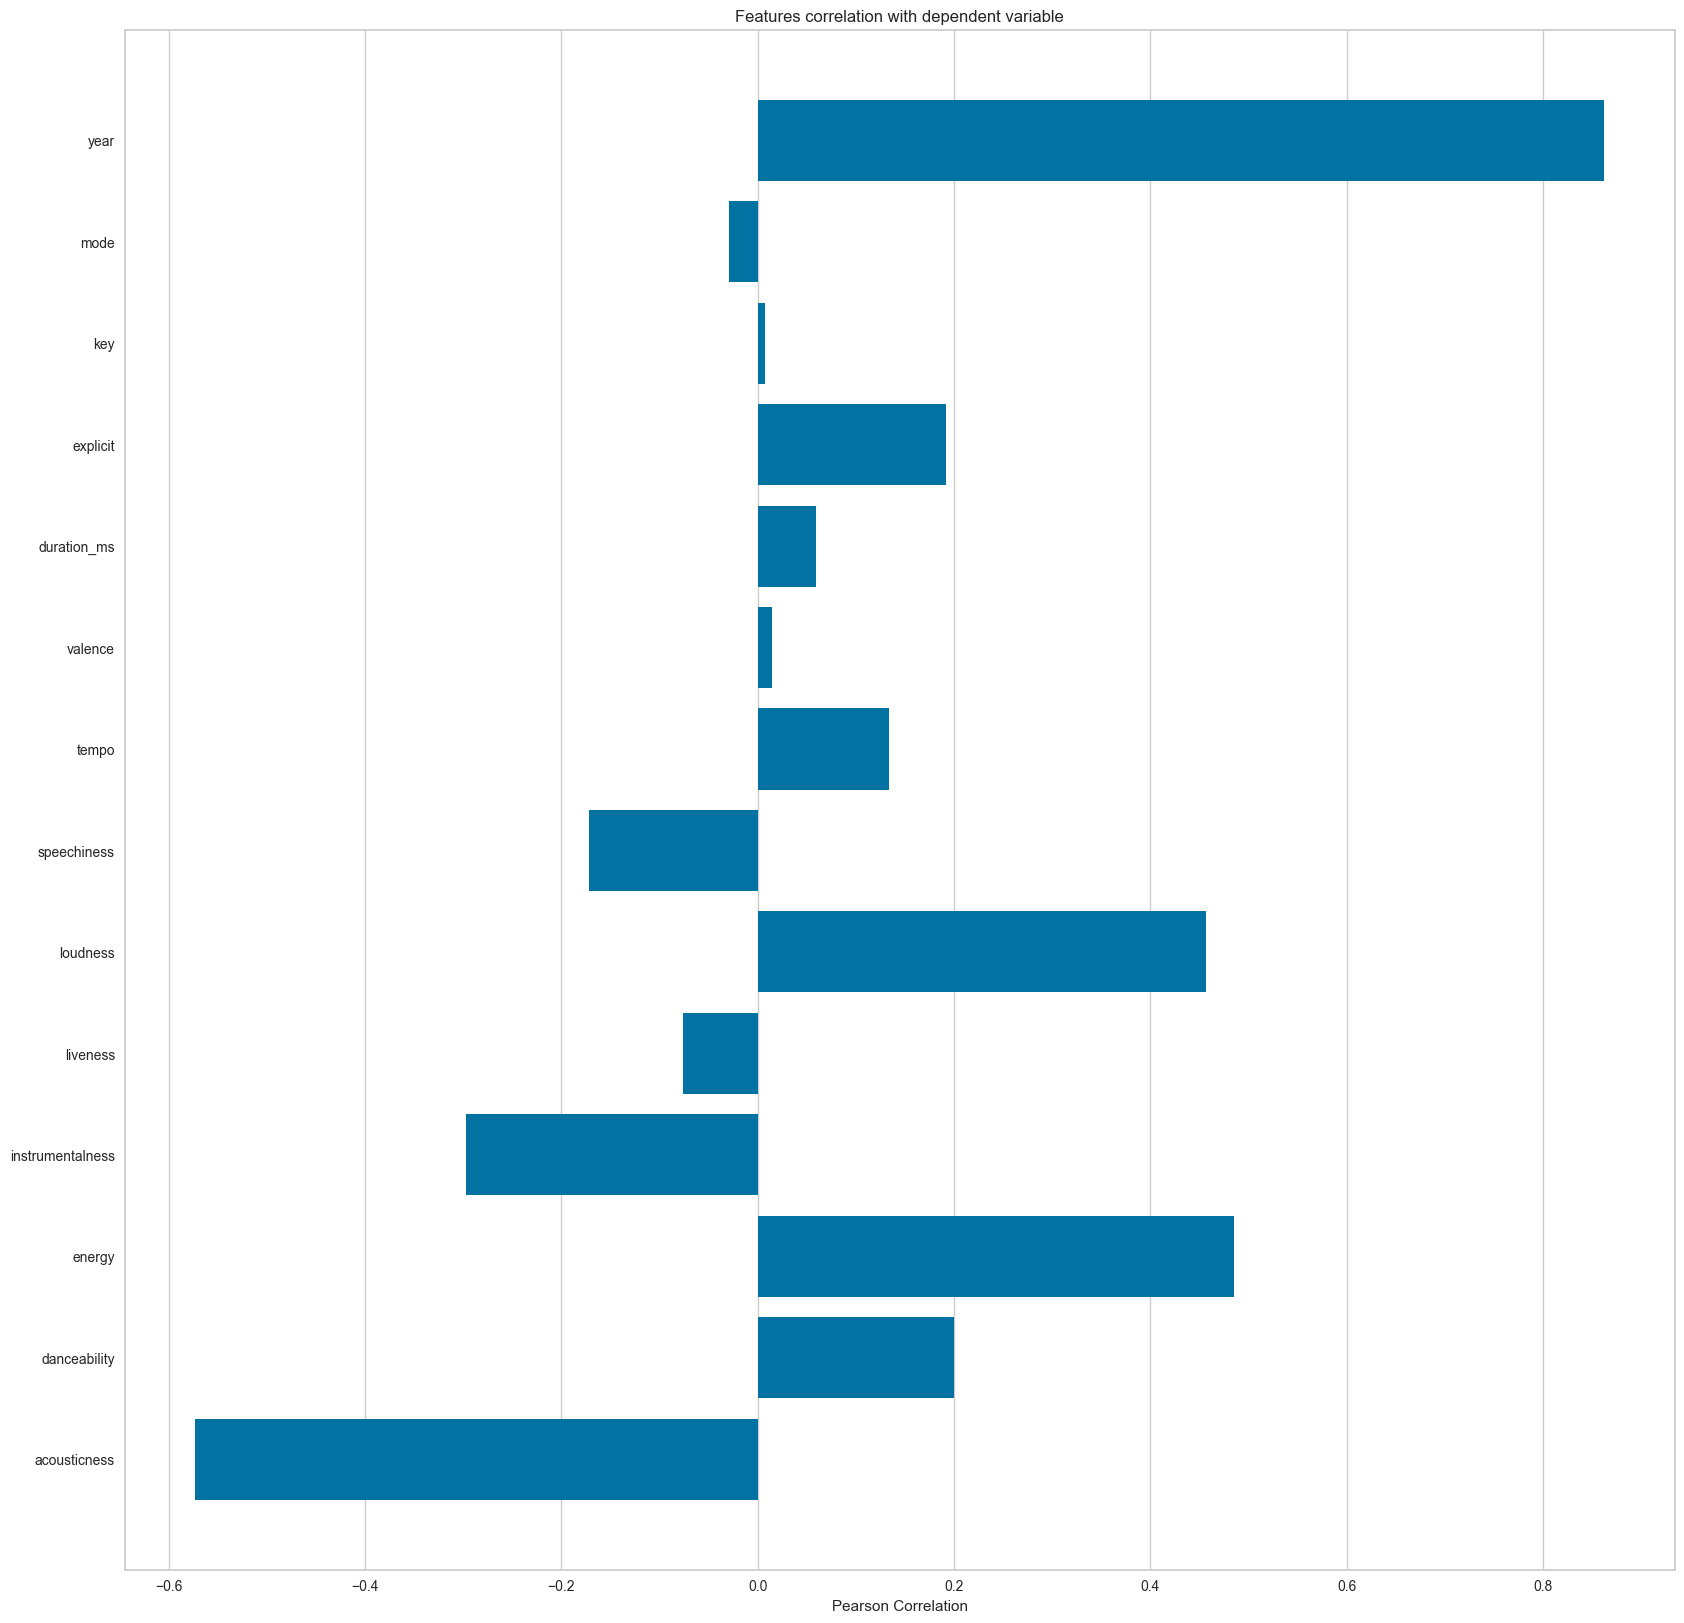

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [5]:
data = pd.read_csv("../data/data.csv")

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.manifold import TSNE

# Transformateur personnalisé pour appliquer des poids
class FeatureWeighting(BaseEstimator, TransformerMixin):
    def __init__(self, weights):
        self.weights = weights

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X * self.weights

# Spécifiez les colonnes à inclure et les poids associés
feature_columns = [
    'mode', 'acousticness', 'danceability', 'duration_ms', 
    'energy', 'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'valence', 'popularity', 'key'
]
weights = np.array([1.5, 2.0, 1.0, 1.2, 0.8, 1.3, 1.0, 0.9, 1.1, 1.0, 1.0, 1.0, 1.4])  # Exemple de poids

# Extraction des données numériques
genre_data = pd.read_csv("../data/data_by_genres.csv")
X = genre_data[feature_columns].select_dtypes(np.number)

# Pipeline pour le clustering avec pondération
cluster_pipeline = Pipeline([
    ('weighting', FeatureWeighting(weights=weights)),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=30, n_init=30))
])

cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

# Pipeline pour la réduction de dimension avec t-SNE
tsne_pipeline = Pipeline([
    ('weighting', FeatureWeighting(weights=weights)),  # Appliquer les mêmes poids
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, verbose=1, random_state=42))
])
genre_embedding = tsne_pipeline.fit_transform(X)

# Préparer les données pour la visualisation
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

# Visualisation des clusters
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres']
)
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.002s...
[t-SNE] Computed neighbors for 2973 samples in 0.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106316
[t-SNE] KL divergence after 1000 iterations: 1.392527


In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

# Pipeline avec DBSCAN
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dbscan', DBSCAN(eps=1.5, min_samples=5))  # Ajustez eps et min_samples selon votre dataset
])

# Sélectionner les colonnes numériques
X = genre_data.select_dtypes(include=['number'])

# Ajuster le pipeline et récupérer les labels
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline['dbscan'].labels_

# Visualisation des clusters avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1))
])

genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.002s...
[t-SNE] Computed neighbors for 2973 samples in 0.325s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.791244
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.181412
[t-SNE] KL divergence after 1000 iterations: 1.394176


In [19]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import plotly.express as px
import os

output_dir = "../data"

genres_clusters_path = os.path.join(output_dir, "genres_clusters.csv")
cluster_characteristics_path = os.path.join(output_dir, "cluster_characteristics.csv")

# Clustering
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('kmeans', KMeans(n_clusters=150, n_init=10))
])
X = genre_data.select_dtypes(include=['number'])
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

# Visualisation avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1))
])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

# Création du premier fichier CSV : genres et clusters associés
genres_clusters_csv = genre_data[['genres', 'cluster']]
genres_clusters_csv.to_csv(genres_clusters_path, index=False)
print(f"Fichier '{genres_clusters_path}' généré avec succès.")

# Filtrer les colonnes numériques uniquement
numeric_cols = genre_data.select_dtypes(include=['number']).columns

# Création du deuxième fichier CSV : clusters et caractéristiques moyennes
cluster_means = genre_data.groupby('cluster')[numeric_cols].mean()

# Réinitialisation de l'index et gestion du conflit avec la colonne 'cluster'
cluster_means['cluster'] = cluster_means.index  # Ajoute 'cluster' en tant que colonne
cluster_means.reset_index(drop=True, inplace=True)  # Réinitialise l'index sans dupliquer 'cluster'

# Sauvegarde des caractéristiques moyennes des clusters dans un fichier CSV
cluster_means.to_csv(cluster_characteristics_path, index=False)
print(f"Fichier '{cluster_characteristics_path}' généré avec succès.")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.003s...
[t-SNE] Computed neighbors for 2973 samples in 0.539s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.891281
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.457352
[t-SNE] KL divergence after 1000 iterations: 1.080547


Fichier '../data/genres_clusters.csv' généré avec succès.
Fichier '../data/cluster_characteristics.csv' généré avec succès.


In [9]:
year_data = pd.read_csv("../data/data_by_year.csv")

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'speechiness']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()